# `geom_function()`

In [1]:
import pandas as pd
from scipy.stats import norm

from lets_plot import *


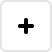
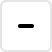
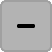
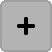
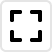
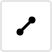
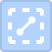
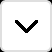
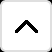
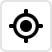

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
def pdf_by_data(data, col):
    xs = data[col]
    loc, scale = xs.mean(), xs.std()
    return lambda t: norm.pdf(t, loc, scale)

### 1. Main Use Case

In [5]:
ggplot(df, aes("cty")) + \
    geom_density() + \
    geom_function(fun=pdf_by_data(df, "cty"), xlim=[9, 35], color="red")

### 2. Use Data to Autodetect `xlim`

In [6]:
ggplot(df, aes("cty")) + \
    geom_density() + \
    geom_function(aes("cty"), data=df, fun=pdf_by_data(df, "cty"), color="red")

### 3. Composition of Function and Statistic

In [7]:
ggplot(df, aes("cty")) + \
    geom_density() + \
    geom_function(fun=pdf_by_data(df, "cty"), xlim=[9, 35], \
                  stat='smooth', method='loess', span=.3, color="red")

### 4. Change Default Geometry

In [8]:
ggplot(df, aes("cty")) + \
    geom_density() + \
    geom_function(aes(fill='y'), fun=pdf_by_data(df, "cty"), xlim=[9, 35], n=30, \
                  geom='histogram', alpha=.5) + \
    scale_fill_brewer(type='seq', palette='YlOrRd', trans='reverse')